# Week 1 Assignment: Text Preprocessing

Overview:

This assignment requires applying the concepts of tokenization, stop word removal, and text normalization.

Students will write their own code for the tasks, analyze the results, and respond to exercises based on results.

Submission Requirements   
	•	Code: Submit a single Jupyter Notebook containing all the Python code.    
	•	Analysis: Include written responses to all analytical prompts in markdown cells within the notebook.    
	•	Visualization: Include all required plots and charts in the notebook.   
	•	Filename: Name the file as
			Week1_TextPreprocessing_<YourName>.pdf



In [2]:
import pandas as pd

# URL for the SMS Spam Dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"

# Load the dataset
sms_data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Display the first few rows
print("First 5 rows of the SMS Spam Dataset:")
print(sms_data.head())

# Check dataset size
print("\nDataset Size:", sms_data.shape)

# Split dataset into spam and ham categories for exploration
print("\nLabel Distribution:")
print(sms_data['label'].value_counts())

First 5 rows of the SMS Spam Dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Size: (5572, 2)

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


## Part 1: Tokenization (20 points)


	1.	Task:   
	•	Load the SMS Spam dataset and select the first 10 messages for tokenization.  
	•	Tokenize using
			- NLTK
			- SpaCy
			- Cutom Regex based tokenizer
	•	Write a custom tokenization function using regular expressions to handle special cases like contractions and hyphenated words.

	2.	Deliverable (15 points):
	•	Python script that demonstrates tokenization using all three approaches.
	•	A brief written response comparing the outputs and discussing differences (e.g., handling contractions, special characters, and hyphenated words).

	3.	Question (5 points)
	•	How do the tokenization results differ between NLTK, SpaCy, and Regex? Which method would you prefer for preprocessing SMS messages, and why?

Load the SMS Spam dataset and select the first 10 messages for tokenization.

In [3]:
messages_to_tokenize = sms_data["message"].head(10).values
messages_to_tokenize

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though",
       "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
       'Even my brother is not like to speak with me. They treat me like aids patent.',
       "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
       'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 090617014

Tokenize using NLTK, SpaCy, Custom Regex based tokenizer.

In [4]:
# Imports
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters
import spacy
import re

### NLTK Tokenization

*Note: The top ten messages have been selected for tokeniziation, but to establish a vocabulary across the entire list of messages, the tokens for each message must be stored. Alternatively, the ten messages can all be appended together and the text block can be tokenized. I have selected word tokenization for this application, as the text corpus is rather small.*

In [5]:
# Method 1:

nltk_tokens_1 = []
for message in messages_to_tokenize:
    nltk_tokens_1.extend(word_tokenize(message))

# Remove duplicates
nltk_tokens_1 = list(nltk_tokens_1)

nltk_tokens_1[0:10]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in']

In [6]:
#Method 2:

message = (" ").join(messages_to_tokenize)
nltk_tokens_2 = word_tokenize(message)

nltk_tokens_2[0:10]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in']

In [7]:
# Check the length of each
print(len(nltk_tokens_1), len(nltk_tokens_2))

248 248


The length is the same between the two methods. To ensure each method is functionally the same, let's compare the contents of each token list.

In [8]:
print(set(nltk_tokens_1)-set(nltk_tokens_2))

set()


The unique tokens are equivalent, as the difference between the sets is an empty set. Just as a sanity check, I want to see what the duplicate tokens are in one of the token lists. 

In [9]:
dup_tokens = {}
for tok in nltk_tokens_2:
    if tok in dup_tokens:
        dup_tokens[tok]+=1
    else:
        dup_tokens[tok]=1

i=0
for tok, count in dup_tokens.items():
    if count>1:
        print(tok, count)
        i+=1
    
    if i>5:
        break

, 3
only 2
in 2
... 6
there 2
Free 2


A majority of these words are stop words, which will be removed anyway in part 2.

### SpaCy Tokenization

Similar to NLTK, the messages can be processed using two different methods. I will compare the token output of both here as well.

In [10]:
# Instantiate the tokenizer
nlp = spacy.load("en_core_web_sm")

In [11]:
# Method 1

spacy_tokens_1 = []
for message in messages_to_tokenize:
    spacy_tokens_1.extend([token.text for token in nlp(message)])

In [12]:
# Method 2

spacy_message = nlp((" ").join(messages_to_tokenize))
spacy_tokens_2 = [token.text for token in spacy_message]

Now that each token list has been generated, compare them.

In [13]:
print(len(spacy_tokens_1), len(spacy_tokens_2))

245 245


In [14]:
print(set(spacy_tokens_1)-set(spacy_tokens_2))

set()


Nice, the lengths are the same and the unique tokens are the same.

### Custom Regex Tokenizer

I am not too familiar with regex, so I will fall back on the lab for this portion.

In [15]:
regex_tokens = re.findall(r"\b\w+(?:-\w+)*(?:'t|n't|'re|'ve|'ll|'d|'s)?\b", (" ").join(messages_to_tokenize))
len(regex_tokens)

211

Verify that contractions and hyphens were included in the set of tokens. First, find the words with contractions and hyphens in the dataset.

In [16]:
#Contractions:

for word in (" ").join(messages_to_tokenize).split(" "):
    if "'" in word:
        print(word)

rate)T&C's
08452810075over18's
don't
it's
week's
I'd
'Melle
Vettam)'


In [17]:
#Hyphens:

for word in (" ").join(messages_to_tokenize).split(" "):
    if "-" in word:
        print(word)

In [18]:
# Print tokens with apostrophes to compare to contraction list
for token in regex_tokens:
    if "'" in token:
        print(token)

C's
08452810075over18's
don't
it's
week's
I'd


In [19]:
# This should be empty, but check anyway
for token in regex_tokens:
    if "-" in token:
        print(token)

### Comparison of Methods

First, take a look at the similar and dissimilar tokens from each of the methods.

In [20]:
same_tokens = set(nltk_tokens_2)&set(spacy_tokens_2)&set(regex_tokens)
print(list(same_tokens)[0:10])
print(f'{len(same_tokens)}')

['entry', 'has', 'brother', 'the', 'call', 'on', 'c', '21st', 'I', 'you']
162


In [21]:
complete_token_list = set(nltk_tokens_2+spacy_tokens_2+regex_tokens)
len(complete_token_list)

199

In [22]:
different_tokens = complete_token_list - same_tokens
print(list(different_tokens)[0:15])
print(f'{len(different_tokens)}')

["I'd", 'rate)T&C', '50', 'C', '08452810075over18', '?', '1.50', 'rate', '...', ')', '£1.50', '.', "'", '£', "it's"]
37


Now, determine what method the dissimilar tokens originate from.

In [23]:
unique_tokens = {'nltk':[],
                 'spacy':[],
                 'regex':[]}

for token in different_tokens:
    if token in nltk_tokens_2:
        unique_tokens['nltk'].append(token)
    elif token in spacy_tokens_2:
        unique_tokens['spacy'].append(token)
    elif token in regex_tokens:
        unique_tokens['regex'].append(token)

In [24]:
print(f'Unique NLTK Tokens: {unique_tokens['nltk']}\n')
print(f'Unique SpaCy Tokens: {unique_tokens['spacy']}\n')
print(f'Unique Regex Tokens: {unique_tokens['regex']}\n')

Unique NLTK Tokens: ['C', '08452810075over18', '?', 'rate', '...', ')', '£1.50', '.', "'", '£900', '(', "'d", '&', '!', 'question', '..', 'T', "'Melle", "n't", 'do', '*', ',', 'week', "'s"]

Unique SpaCy Tokens: ['rate)T&C', '1.50', '£', '900', 'question(std']

Unique Regex Tokens: ["I'd", '50', "it's", "08452810075over18's", "C's", "don't", "week's", '1']



Based on the unique tokens for each method, there are a few conclusions:
1. Regex was the only method that retained contractions with the root word as a singular token.
2. SpaCy appeared to separate on special characters, like £, where regex and NLTK did not. Additionally, SpaCy did not separate on erroneous delimiters, such as a parenthesis in a word, and it appears to have entirely removed erroneous alphanumeric words.
3. NLTK seems to be the most granular tokenizer. Delimiters, punctuation, and contractions are all separated into individual tokens. Additionally, alphanumeric words are retained as unique tokens, not removed.

For this application, I would prefer NLTK. The granularity in the tokenization will be the most effective when performing text generation or sentiment analysis. The tradeoff with this approach is the larger vocabulary, but it is important to remember that text is sequential, and meaning can be inferred from combinations of tokens. NLTK may have generated the most tokens on this data set, but the requirement for additional tokens to capture all word variants with contractions or prefixes is no longer necessary, dramatically reducing the vocabulary in larger data sets.

## Part 2: Stop Word Removal (20 points)


	1.	Task:
	•	Use NLTK & SpaCy to remove default stop words from the tokenized messages.
	•	Add custom stop words relevant to SMS messages (e.g., “free”, “click”, “call”).

	2.	Deliverable (15 points):
	•	Python script for stop word removal using NLTK & SpCy
	•	A bar chart comparing word frequency distributions before and after stop word removal.

	3.	Question (5 points):
	•	How does removing stop words impact the vocabulary size and word frequency distribution in the SMS dataset?

### NLTK Stop Word Removal

In [25]:
from nltk.corpus import stopwords

In [26]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\water\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Removal of default stop words.

In [27]:
nltk_stop_words = set(stopwords.words('english'))
nltk_tokens_without_stopwords = [token for token in nltk_tokens_2 if token.lower() not in nltk_stop_words]
print(f'Original: {nltk_tokens_2[0:25]}\nFiltered: {nltk_tokens_without_stopwords[0:25]}')

Original: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...', 'Ok']
Filtered: ['Go', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif']


Removal of custom stop words.

In [28]:
custom_stopwords = ["free", "text", "click", "call"]
nltk_tokens_without_stopwords_custom = [token for token in nltk_tokens_2 if token.lower() not in nltk_stop_words.union(custom_stopwords)]

custom_stopword_count = {stopword:0 for stopword in custom_stopwords}
for word in nltk_tokens_2:
    if word.lower() in custom_stopwords:
        custom_stopword_count[word.lower()]+=1

print('Custom stop word count in original NLTK token list:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')



Custom stop word count in original NLTK token list:
Word: free	Count: 3
Word: text	Count: 1
Word: click	Count: 0
Word: call	Count: 2


In [29]:
custom_stopword_count = {stopword:0 for stopword in custom_stopwords}
for word in nltk_tokens_without_stopwords_custom:
    if word.lower() in custom_stopwords:
        custom_stopword_count[word.lower()]+=1

print('Custom stop word count in NLTK token list with stopword removal:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')

Custom stop word count in NLTK token list with stopword removal:
Word: free	Count: 0
Word: text	Count: 0
Word: click	Count: 0
Word: call	Count: 0


### SpaCy Stop Word Removal

In [30]:
nlp_for_stop_words = spacy.load("en_core_web_sm")
spacy_tokens_default_stopword = nlp_for_stop_words((" ").join([message.lower() for message in messages_to_tokenize]))
filtered_words_default_spacy = [token.text for token in spacy_tokens_default_stopword if not token.is_stop]

In [31]:
custom_stopword_count = {stopword:0 for stopword in custom_stopwords}

for word in filtered_words_default_spacy:
    if word in custom_stopwords:
        custom_stopword_count[word]+=1

print('Custom stop word count in original SpaCy token list:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')

Custom stop word count in original SpaCy token list:
Word: free	Count: 3
Word: text	Count: 1
Word: click	Count: 0
Word: call	Count: 0


In [32]:
nlp_for_custom_stop_words = spacy.load("en_core_web_sm")
spacy_tokens_custom_stopword = nlp_for_custom_stop_words((" ").join([message.lower() for message in messages_to_tokenize]))
filtered_words_custom_spacy = [token.text for token in spacy_tokens_custom_stopword if not token.is_stop]

In [33]:
nlp_for_custom_stop_words.Defaults.stop_words |= set(custom_stopwords)
filtered_words_with_custom_spacy = [token.text for token in spacy_tokens_custom_stopword if not token.is_stop]

In [34]:
custom_stopword_count = {stopword:0 for stopword in custom_stopwords}

for word in filtered_words_with_custom_spacy:
    if word in custom_stopwords:
        custom_stopword_count[word]+=1

print('Custom stop word count in original SpaCy token list:')
for word, count in custom_stopword_count.items():
    print(f'Word: {word}\tCount: {count}')

Custom stop word count in original SpaCy token list:
Word: free	Count: 3
Word: text	Count: 1
Word: click	Count: 0
Word: call	Count: 0


In [35]:
len(filtered_words_default_spacy)

158

In [36]:
len(filtered_words_custom_spacy)

158

### Bar Charts

In [37]:
import matplotlib.pyplot as plt

#### NLTK word frequency plots

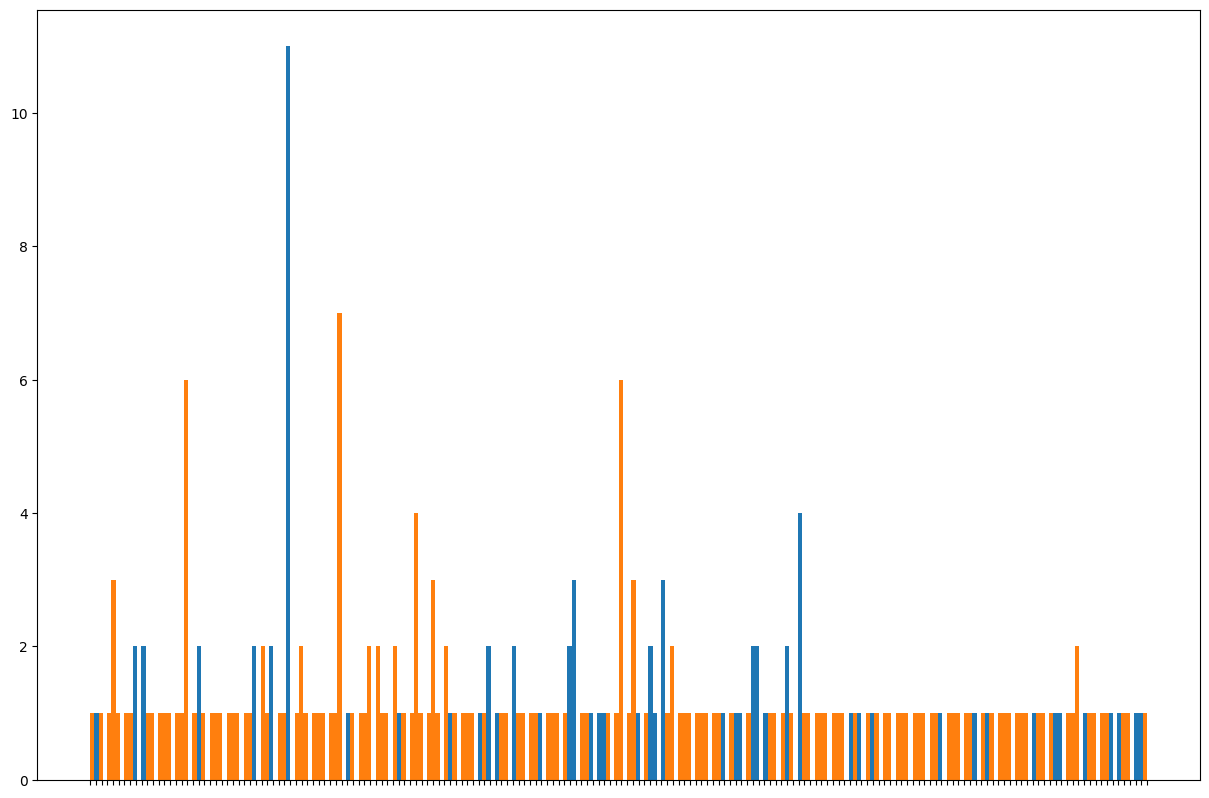

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

ax.hist(nltk_tokens_2, bins=len(nltk_tokens_2))
ax.hist(nltk_tokens_without_stopwords_custom, bins=len(nltk_tokens_2))

# Remove the x-axis labels
ax.set_xticklabels([])

plt.show()

#### SpaCy Word Frequency Plots

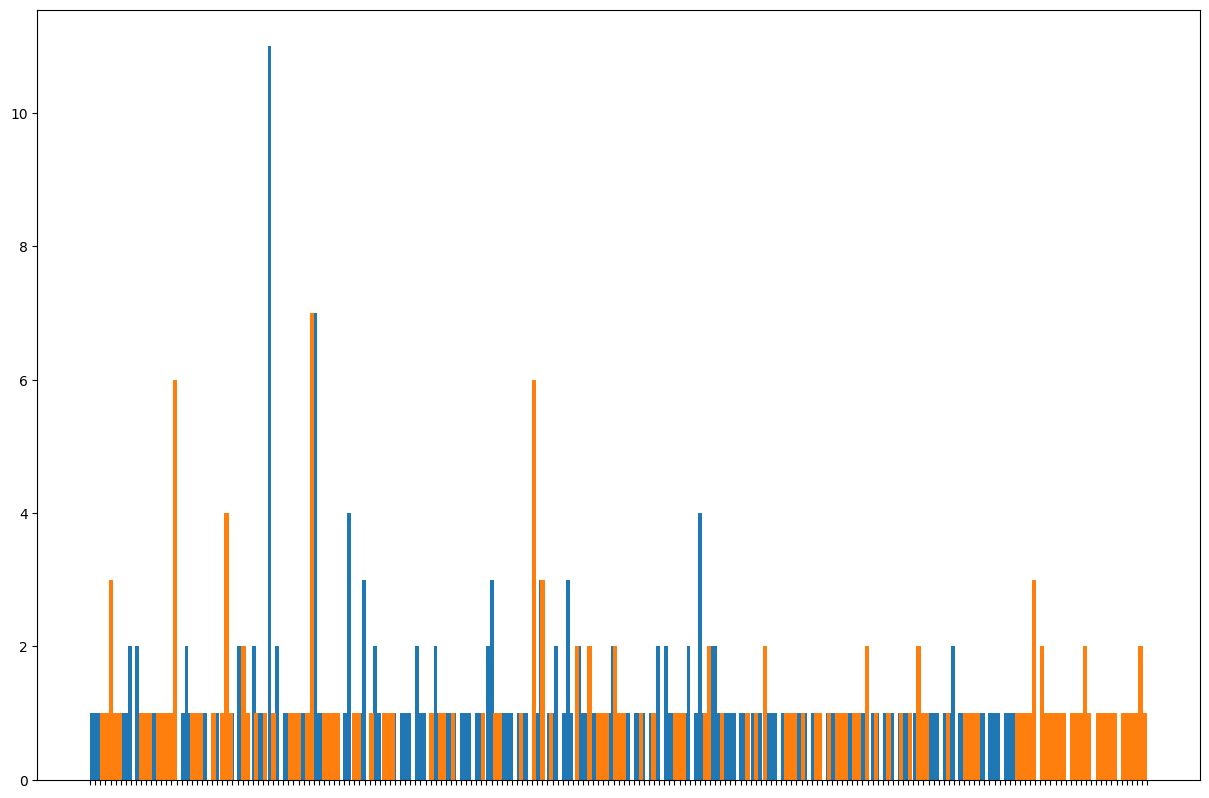

In [39]:
spacy_message = nlp((" ").join(messages_to_tokenize))
spacy_tokens = [token.text for token in spacy_message]

fig, ax = plt.subplots(figsize=(15,10))

ax.hist(spacy_tokens, bins=len(spacy_tokens))
ax.hist(filtered_words_with_custom_spacy, bins=len(spacy_tokens))

# Remove the x-axis labels
ax.set_xticklabels([])

plt.show()

In [40]:
# Check the change in vocabulary for NLTK
print('Before stop word removal:')
print(len(set(nltk_tokens_2)))

print('After stop word removal:')
print(len(set(nltk_tokens_without_stopwords)))

Before stop word removal:
186
After stop word removal:
145


In this case, removing stop words reduces the vocabulary size by 22% for the NLTK approach. Additionally, the token frequency distribution becomes more uniform, as seen in the overlayed histogram plots. Many of the moset frequent words in the original data set are stop words, as indicated by their frequency dropping to 0.

## Part 3: Text Normalization (30 points)


	1.	Task:
	•	Normalize the SMS messages by:
	•	Lowercasing all text
	•	Removing punctuation and numbers.
	•	Replacing abbreviations (e.g., “u” → “you”, “r” → “are”).
	•	Implement a reusable normalization function that combines these steps.

	2.	Deliverable (25 points):
	•	Python code for the normalization function.
	•	Example output showing the text before and after normalization.

	3.	Question (5 points):
	•	Which normalization steps had the most significant impact on SMS messages? Explain why.

First, determine the abbreviations. I will go about this by searching for all words that are two letters or less.

In [41]:
abbreviations = {word for word in (" ").join(messages_to_tokenize).split(" ") if len(word)<3}
list(abbreviations)[0:10]

['R', 'FA', 'Tb', 'n', 'a', '12', '*9', 'as', 'on', 'c']

In [42]:
def normalize(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    
    # Convert to lower case and store as a list
    words=text.lower().split(" ")

    # Abbreviations to look for... Some of these were identified while slicing the normalized text 
    # to verify this function.
    abbreviations = {"u":"you",
                     "c":"see",
                     "n":"and",
                     "r":"are",
                     "k":"okay",
                     "v":"very",
                     "ur":"your",
                     "cuz":"because",
                     "wkly":"weekly",
                     "txt":"text",
                     "tkts":"tickets",
                     "comp":"competition"}
    
    # Loop through the words and replace the abbreviations with real words
    for i, word in enumerate(words):
        if word in abbreviations:
            words[i]=abbreviations[word]

    return (" ").join(words)

In [43]:
original_text = (" ").join(messages_to_tokenize)
original_text[175:275]

"n FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's app"

In [44]:
normalized_text = normalize((" ").join(messages_to_tokenize))
normalized_text[175:275]

'a cup final tickets st may  text fa to  to receive entry questionstd text ratetcs apply overs you du'

Based on the pre and post normalized text, it appears that number and punctuation removal has the greatest impact on SMS data. In this case, numerical portions of a date are removed, leaving a gap in context. Additionally, parenthesis are removed, leading to erroneous words. The other normalization techniques are more subtle and less ubiquitous, contributing less to the overall change in the meaning of the text data.

## Part 4: Combining All Preprocessing Steps (30 points)

	1.	Task:
	•	Combine tokenization, stop word removal, and normalization into a single preprocessing pipeline.
	•	Apply the pipeline to first 50 messages in the SMS Spam dataset
	•	Visualize the most frequent words after preprocessing using a bar chart

	2.	Deliverable (25 points):
	•	Python code for the preprocessing pipeline.
	•	A bar chart displaying the top 10 most frequent words.

	3.	Question (5 points):
	•	How does preprocessing improve the dataset for text classification tasks (e.g. spam detection)?

The preprocessing pipeline will be structured as follows:
1. Normalize
    - Normalization will occur first to lowercase the text and replace abbreviations. This will avoid tokens being mistaken for abbreviations, as tokens may not be whole words.
2. Stop Word Removal
    - Stop word removal is performed prior to tokenization because the preferred package is NLTK. This is precautionary, as NLTK appeared to tokenize into smaller subsets than other approaches. I want to ensure the stop words, which are full english words, are removed prior to tokenization, where they may be truncated.
3. Tokenize
    - Tokenization occurs last on the cleaned dataset.

In [45]:
def preprocess_text(text):
    normalized_text = normalize(text)
    normalized_without_stopwords = " ".join([word for word in normalized_text.split(" ") if word not in nltk_stop_words])
    tokens = word_tokenize(normalized_without_stopwords)
    return tokens
    

In [46]:
preprocessed_tokens = preprocess_text(" ".join(sms_data["message"].head(50).values))
preprocessed_tokens[125:150]

['gon',
 'na',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'okay',
 'ive',
 'cried',
 'enough',
 'today',
 'six',
 'chances',
 'win',
 'cash',
 'pounds',
 'text',
 'csh',
 'send',
 'cost',
 'pday']

In [47]:
def find_common(tokens):
    token_frequency = {}
    for token in tokens:
        if token in token_frequency:
            token_frequency[token]+=1
        else:
            token_frequency[token]=1

    most_common_counts = sorted(token_frequency.values(), reverse=True)[0:10]
    common_tokens = []
    for tok, count in token_frequency.items():
        if count in most_common_counts:
            common_tokens.extend([tok]*count)
    
    return common_tokens

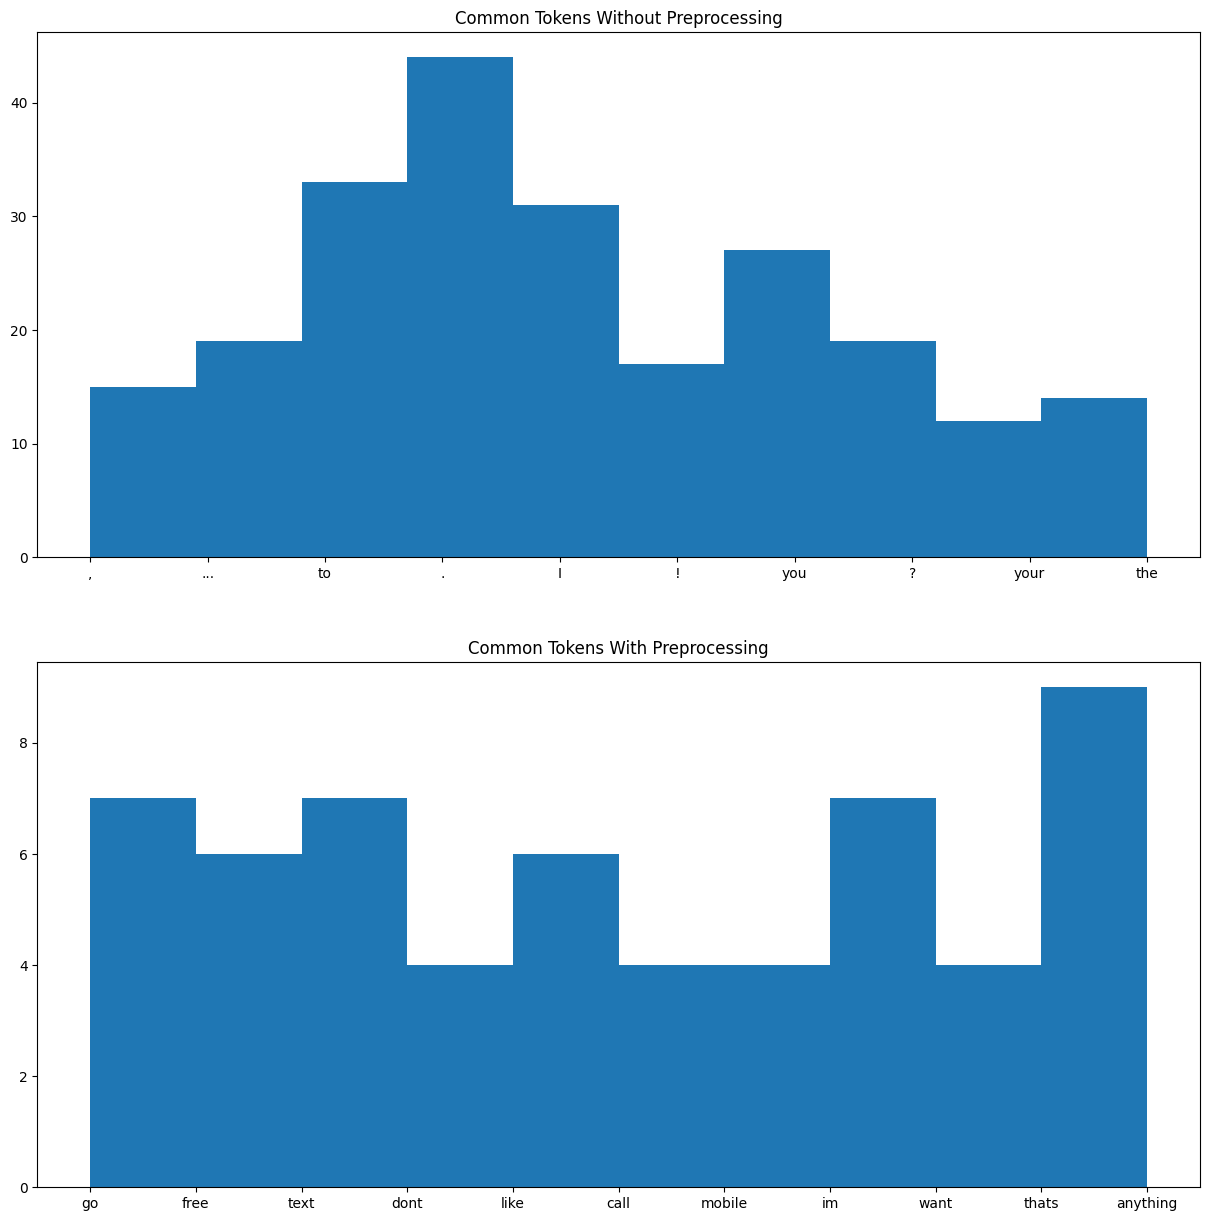

In [48]:
tokens_wo_preprocessing = word_tokenize(" ".join(sms_data["message"].head(50).values))
common_tokens_wo_preprocessing = find_common(tokens_wo_preprocessing)

common_tokens_preprocessed = find_common(preprocessed_tokens)

fig, ax = plt.subplots(nrows=2, figsize=(15,15))

ax[0].hist(common_tokens_wo_preprocessing)
ax[0].set_title("Common Tokens Without Preprocessing")
ax[1].hist(common_tokens_preprocessed)
ax[1].set_title("Common Tokens With Preprocessing")

plt.show()

Preprocessing aids in classification tasks as it makes the text data more predictable for the model. Text is inherently unstructured, so training a generalized model to understand all text without a provided context requires massive amounts of data and compute. Trimming down the input data and normalizing it to a given format can reduce the dimensionality of the data, requiring fewer model parameters and less training data for generalization.